# Breaking Down the Numbers: A Statistical Overview of Lung Cancer Cases Worldwide
### <span style="color:#0000FF">*Aakanksha Parekh, 100871641*</span>

### 1- Introduction.

Cancer? It's a pretty scary word. And when it comes to lung cancer, it's not just a health issue but a global concern causing a great deal of struggles and sadly, too many deathes. Upon discovering the "survey lung cancer" dataset on Kaggle, it prompted a focused exploration into lung cancer statistics for my data analysis report. 

The primary aim of my analysis is to conduct an in-depth examination of the symptoms and contributing factors associated with lung cancer. Upon encountering the dataset curated by 'Mysar Ahmad Bhat' on Kaggle, a series of questions naturally emerged: "How do our daily lifestyle habits influence the potential risk of developing lung cancer?" "Which symptoms of lung cancer might be dismissed due to their commonality to flu and minor infection symptoms?" and "How can we find correlations between lung cancer, its symptoms, and lifestyle factors to gain understanding of the disease?"

Through data analysis and discussions, my intent is to address these inquiries, offering insights into the multifaceted landscape of lung cancer.

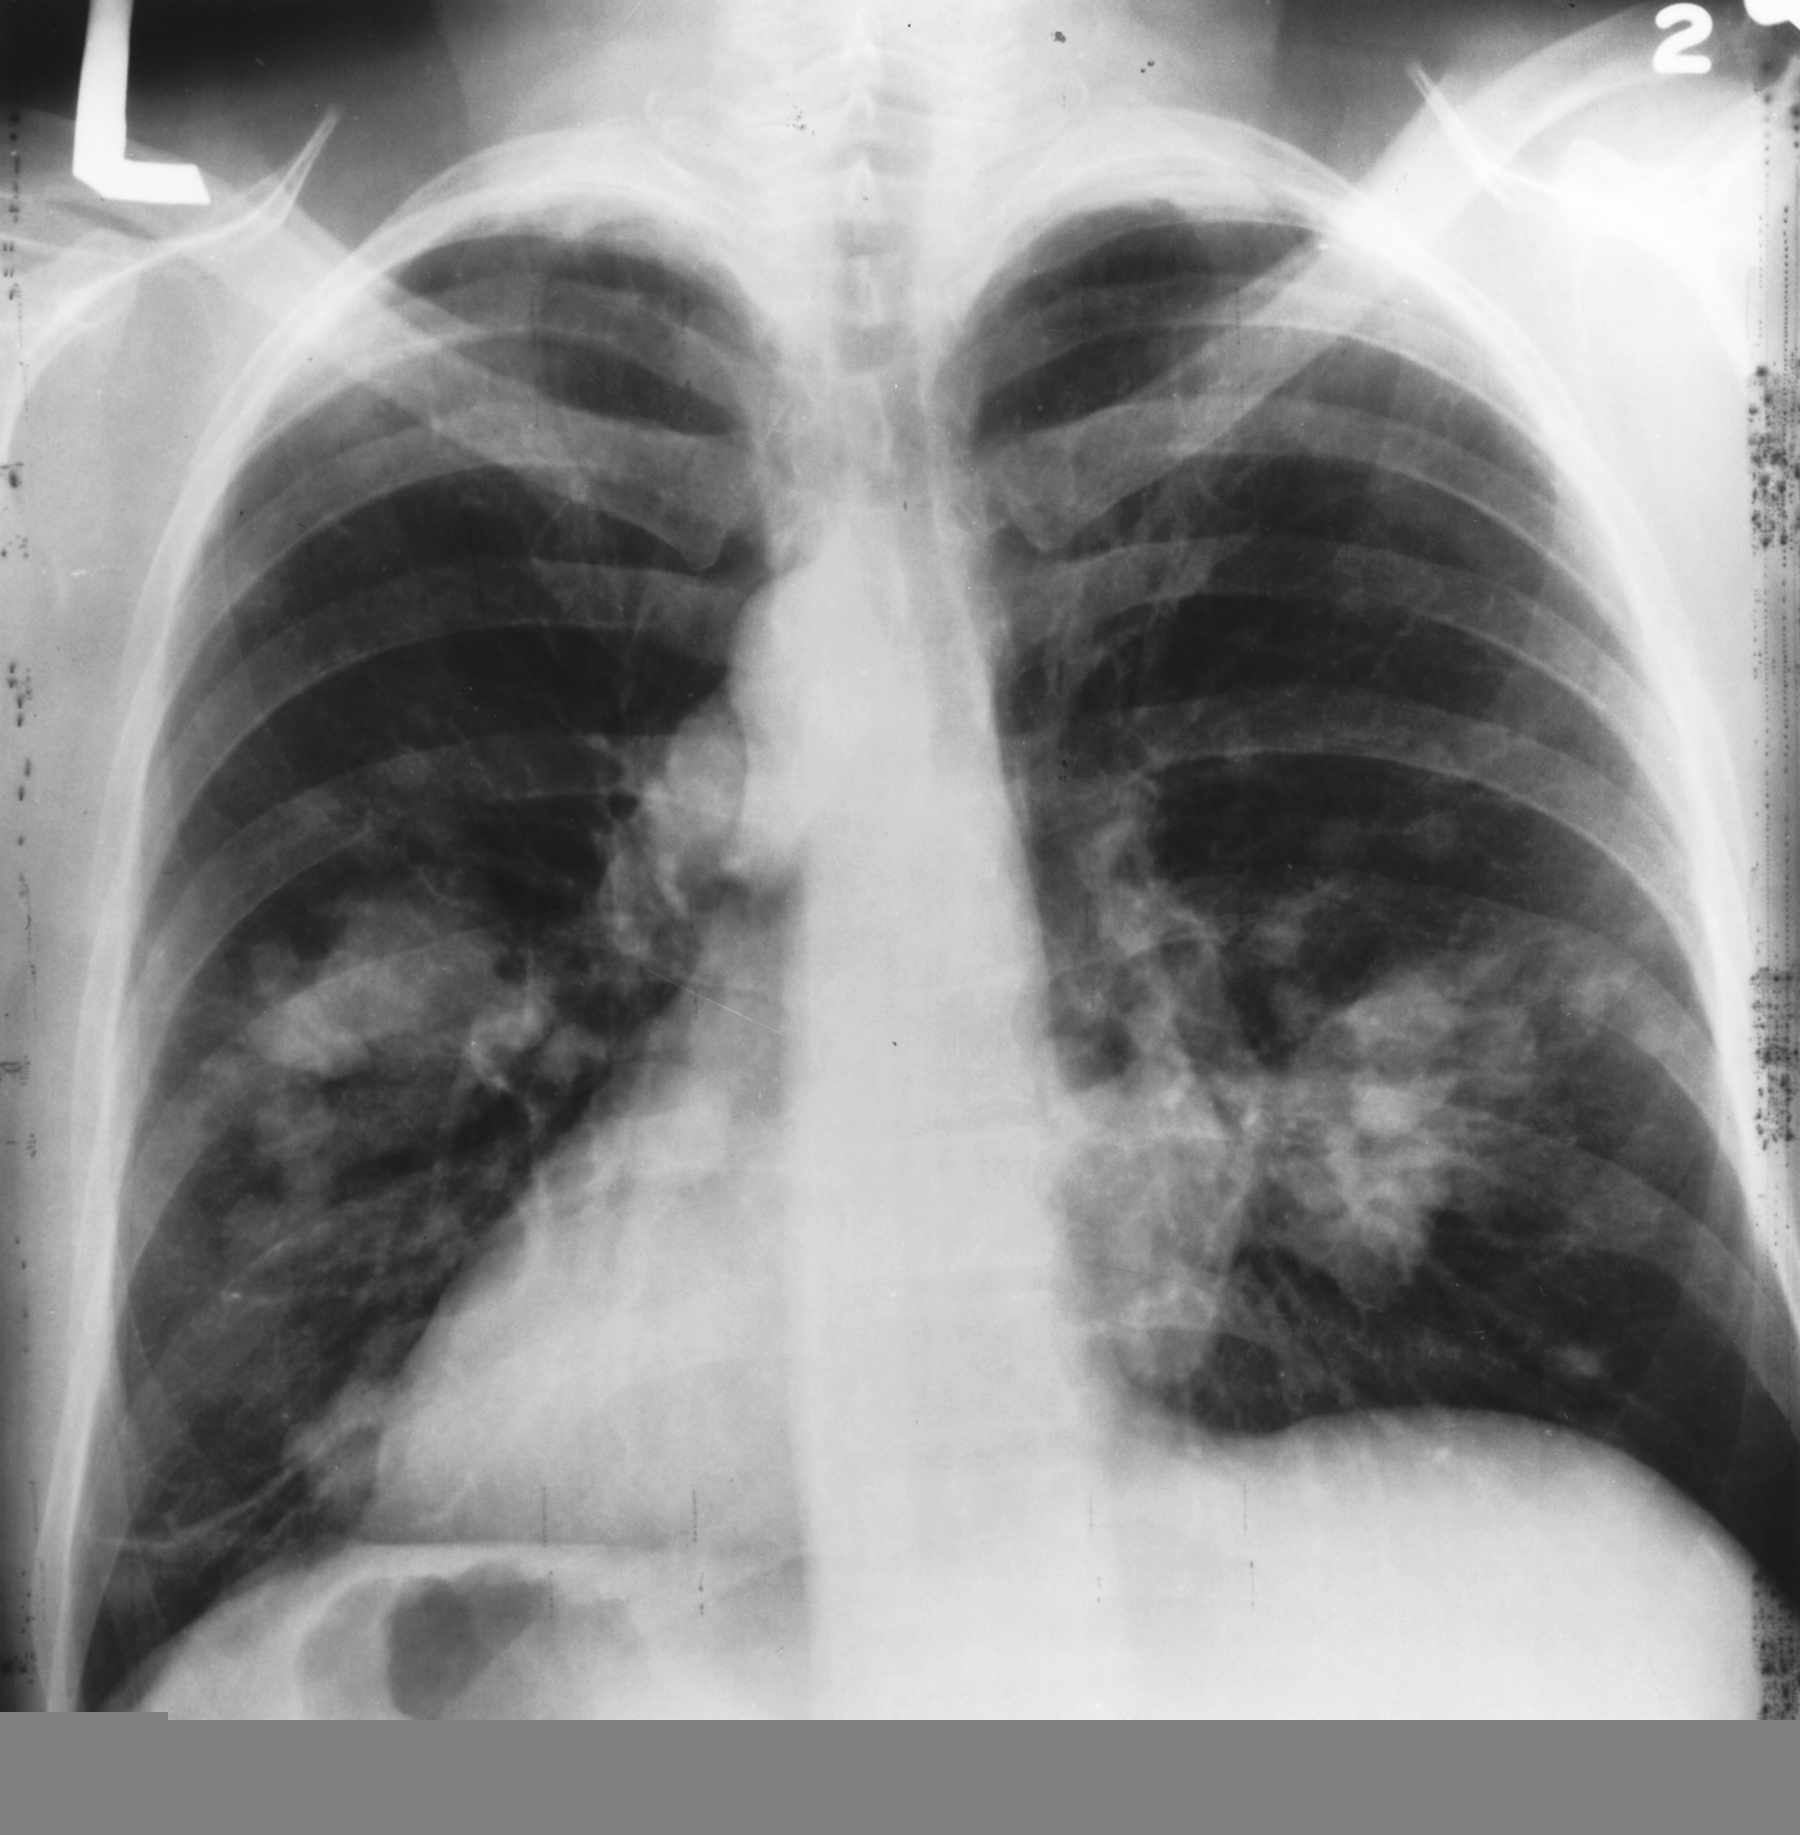

In [2]:
import requests
from IPython.display import Image, display

display(
    Image(
        filename="images/lung_xray_pic.jpg",
        width=500   
    )
)



## 2- Data Methods
### 2.1- Data Collection & Loading 

In [3]:
#import statments for the packages we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
from pathlib import Path

BASE_DIR = Path.cwd()

if not (BASE_DIR / "data").exists():
    BASE_DIR = Path(__file__).parent if "__file__" in globals() else Path.cwd().parent

DATA_PATH = BASE_DIR / "data" / "survey_lung_cancer.csv"

print("Using data path:", DATA_PATH)
lungData = pd.read_csv(DATA_PATH)
lungData.head()


Using data path: c:\Users\adpar\OneDrive\Desktop\gitHub repos\lung-cancer-data-viz\data\survey_lung_cancer.csv


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
# Preview
lungData.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


### 2.2- Data Cleaning & Manipulation

In [6]:
lungData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
# Checking to see how many null values are present in the data
lungData.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### It appears that our dataset has no null values, top-notch condition. Let's proceed with the rest of Data Methods.

In [8]:
# Check for duplicates and remove them (in-place)
lungData.duplicated().sum()
lungData.drop_duplicates(inplace=True)


In [9]:
# Checking how our Data Summary looks like now
lungData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [10]:
# Quick data summary (after removing duplicates)
lungData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [11]:
# Clean column names + map 1/2 to No/Yes for binary features
# (The dataset uses 1/2 for many symptoms/behaviours; 2 means "Yes")
lungData.columns = [c.replace("_", " ") for c in lungData.columns]

binary_cols = [c for c in lungData.columns if c not in ["AGE", "GENDER"]]

# Some versions use YES/NO strings for the target already; we only map numeric 1/2 columns
map_12 = {1: "No", 2: "Yes"}
for c in binary_cols:
    if pd.api.types.is_numeric_dtype(lungData[c]):
        lungData[c] = lungData[c].map(map_12).astype("category")

# Standardize target formatting if needed
if "LUNG CANCER" in lungData.columns:
    lungData["LUNG CANCER"] = lungData["LUNG CANCER"].astype(str).str.upper().map({"YES":"Yes","NO":"No"}).fillna(lungData["LUNG CANCER"])
    lungData["LUNG CANCER"] = lungData["LUNG CANCER"].astype("category")

lungData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 276 non-null    object  
 1   AGE                    276 non-null    int64   
 2   SMOKING                276 non-null    category
 3   YELLOW FINGERS         276 non-null    category
 4   ANXIETY                276 non-null    category
 5   PEER PRESSURE          276 non-null    category
 6   CHRONIC DISEASE        276 non-null    category
 7   FATIGUE                276 non-null    category
 8   ALLERGY                276 non-null    category
 9   WHEEZING               276 non-null    category
 10  ALCOHOL CONSUMING      276 non-null    category
 11  COUGHING               276 non-null    category
 12  SHORTNESS OF BREATH    276 non-null    category
 13  SWALLOWING DIFFICULTY  276 non-null    category
 14  CHEST PAIN             276 non-null    category

### Seems like our Data Cleaning is done! Let's get to the fun bit. NOTE: 1 means no and 2 means yes in this data set.

## 3- Analysis and Visualization of Data
### <span style="color:#808080">*Here, we will create plots, graphs to visually represent our Data!*</span>

### 3.1- Does Consuming Alcohol cause Lung Cancer?

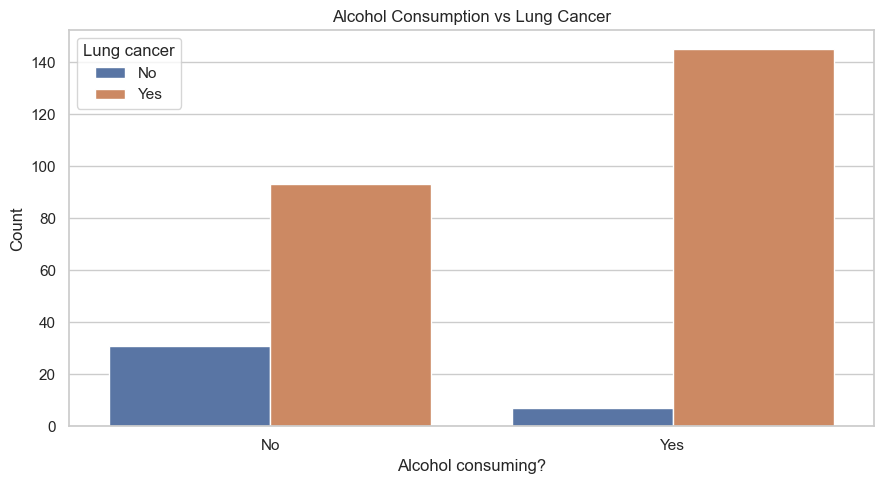

In [12]:
# Alcohol consumption vs lung cancer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(9,5))
sns.countplot(data=lungData, x="ALCOHOL CONSUMING", hue="LUNG CANCER")
plt.title("Alcohol Consumption vs Lung Cancer")
plt.xlabel("Alcohol consuming?")
plt.ylabel("Count")
plt.legend(title="Lung cancer")
plt.tight_layout()
plt.show()


### 3.2- Does Smoking cause Lung Cancer?

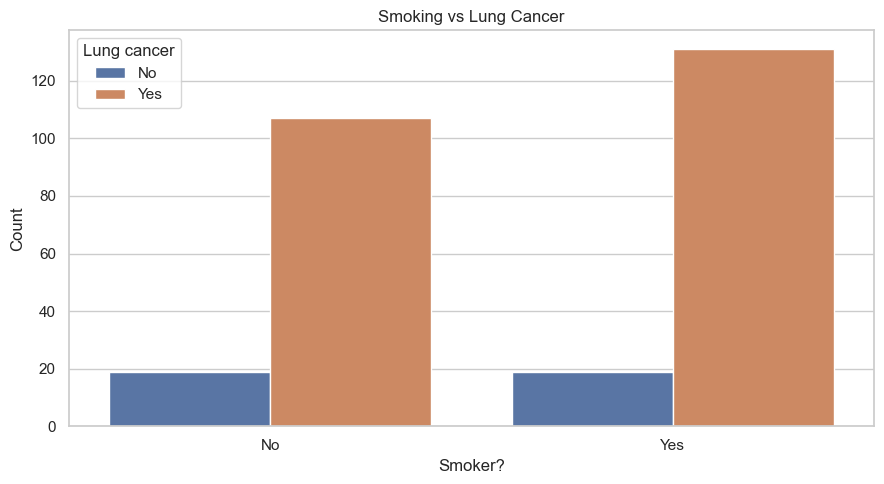

In [13]:
# Smoking vs lung cancer
plt.figure(figsize=(9,5))
sns.countplot(data=lungData, x="SMOKING", hue="LUNG CANCER")
plt.title("Smoking vs Lung Cancer")
plt.xlabel("Smoker?")
plt.ylabel("Count")
plt.legend(title="Lung cancer")
plt.tight_layout()
plt.show()


### 3.3- What are the impacts of both Alcohol and Smoking on Lung Cancer?

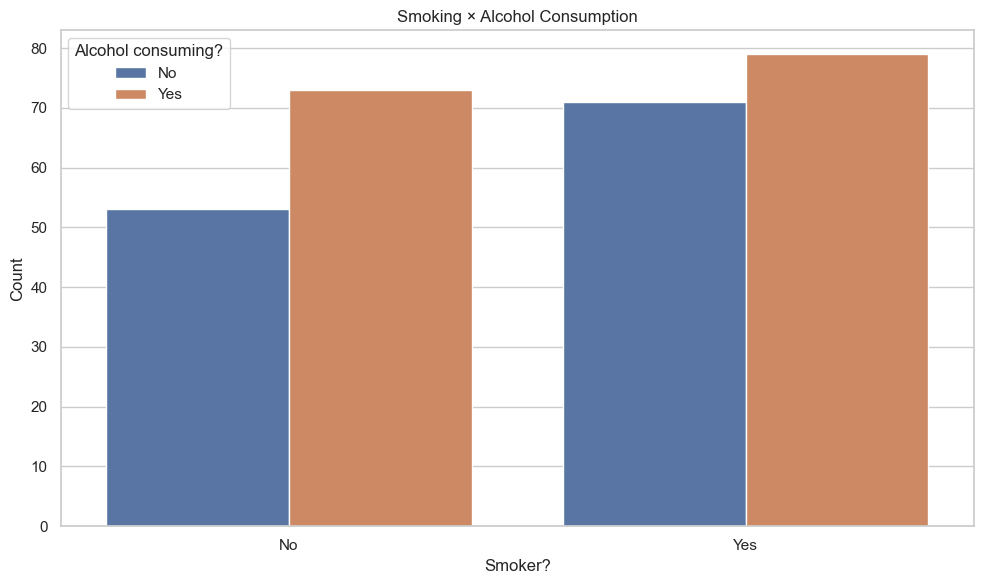

In [14]:
# Smoking x Alcohol consumption (interaction)
plt.figure(figsize=(10,6))
sns.countplot(
    data=lungData,
    x="SMOKING",
    hue="ALCOHOL CONSUMING",
    hue_order=["No","Yes"]
)
plt.title("Smoking × Alcohol Consumption")
plt.xlabel("Smoker?")
plt.ylabel("Count")
plt.legend(title="Alcohol consuming?")
plt.tight_layout()
plt.show()


### 3.4 - What is the Age Distribution of Lung Cancer?

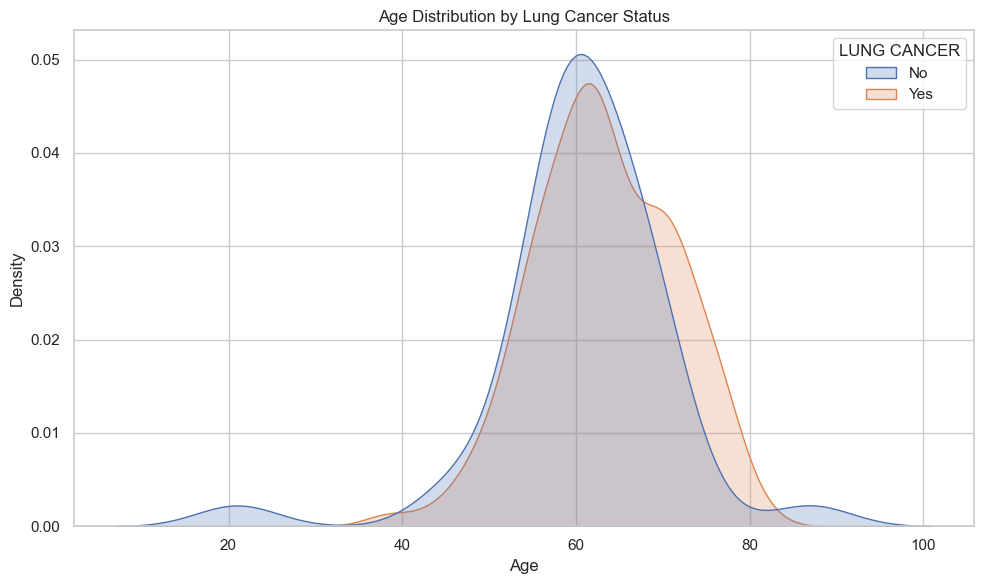

In [15]:
# Age distribution by lung cancer status
plt.figure(figsize=(10,6))
sns.kdeplot(data=lungData, x="AGE", hue="LUNG CANCER", common_norm=False, fill=True)
plt.title("Age Distribution by Lung Cancer Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


### 3.5- What is the Gender Distribution of Lung Cancer?

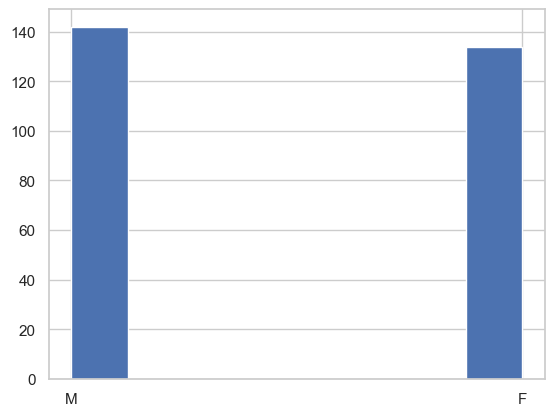

In [16]:
# Creating a histogram to visualize the distribution of lung cancer cases based on gender.
gender = lungData.GENDER.hist(bins=8)

### 3.6- Each Symptom & Factor of Lung Cancer Broken down into Graphs

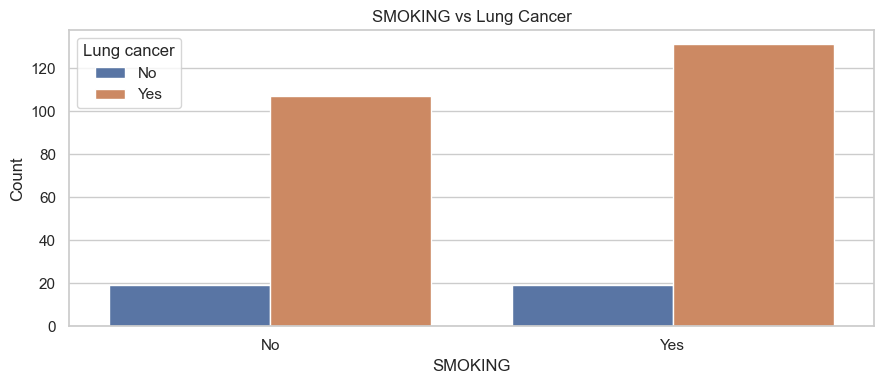

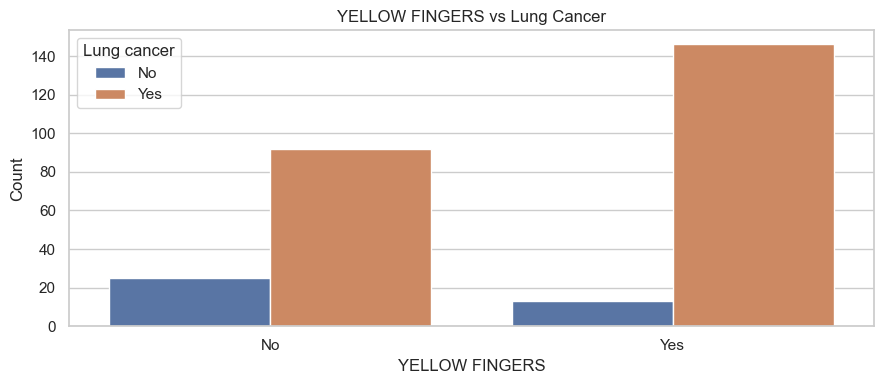

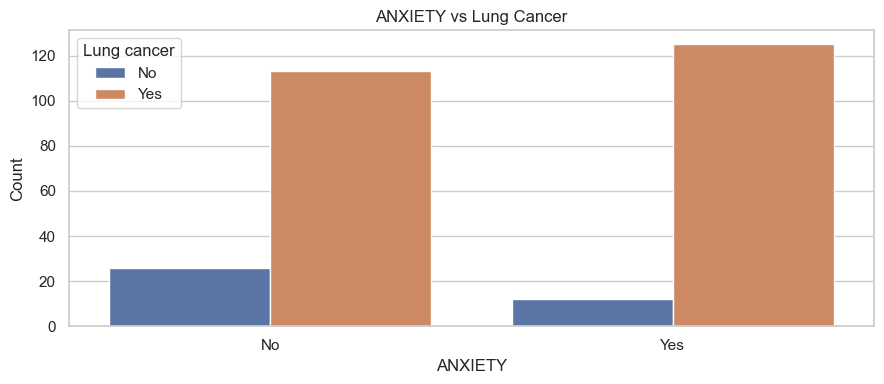

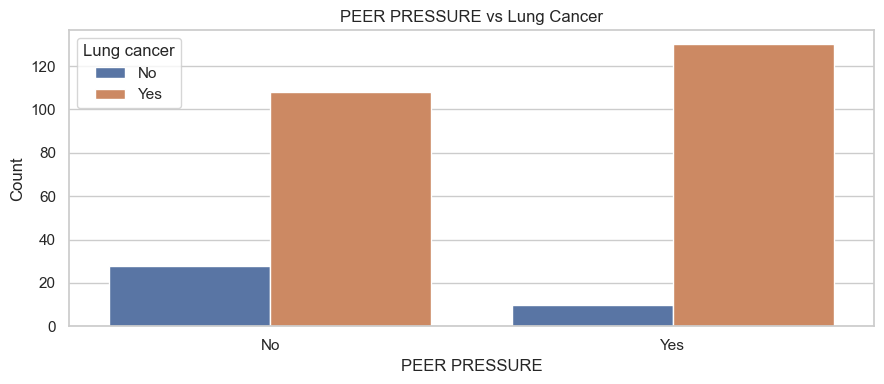

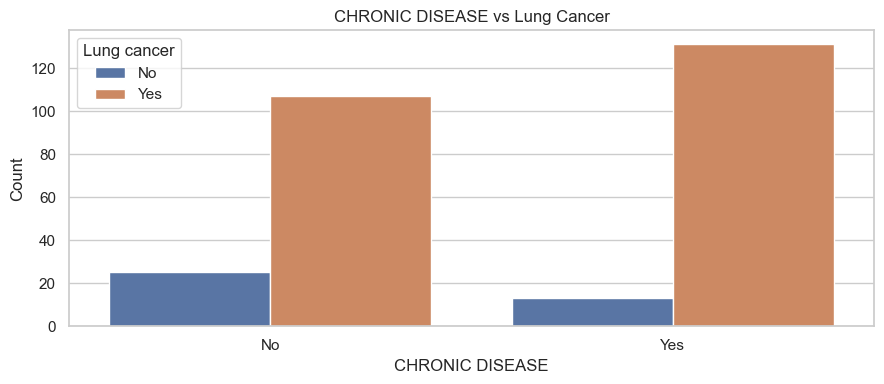

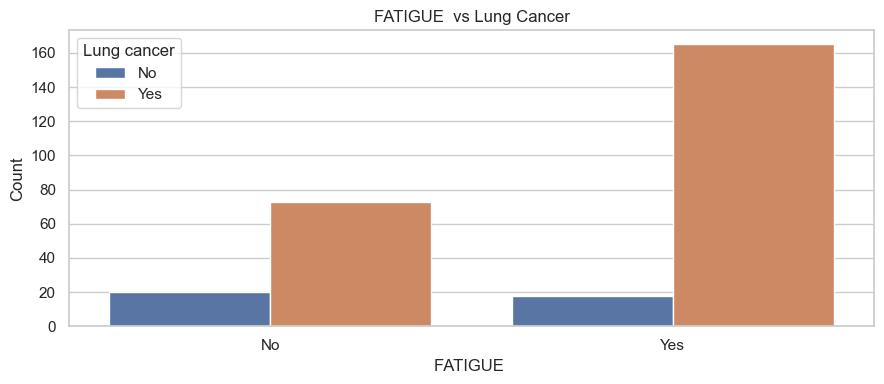

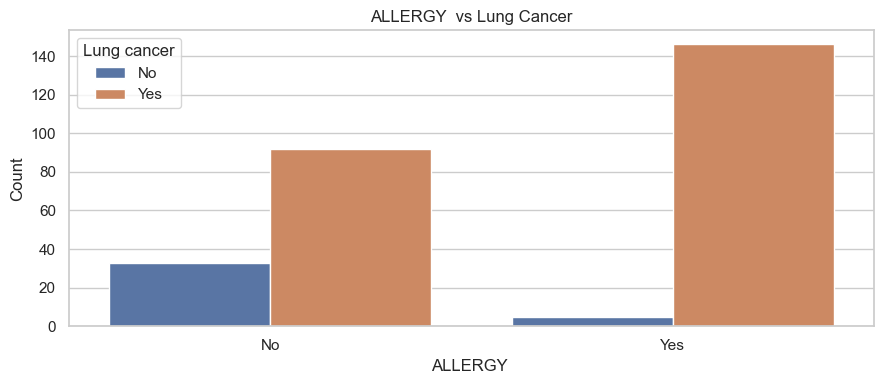

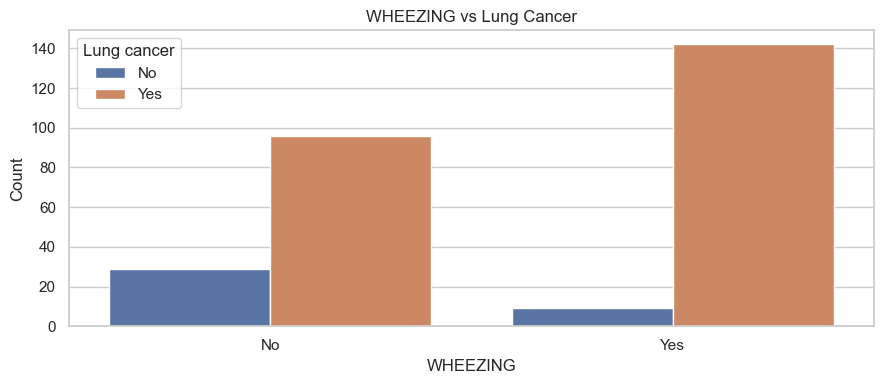

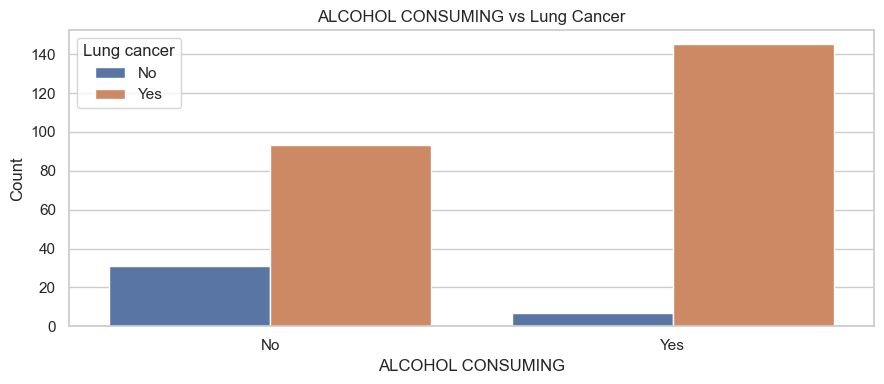

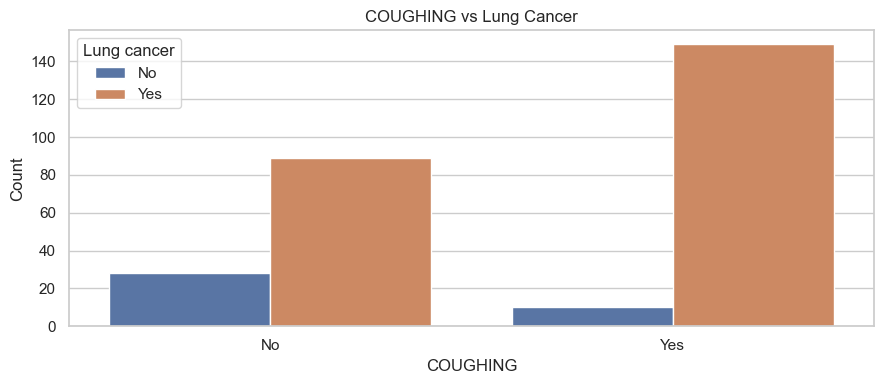

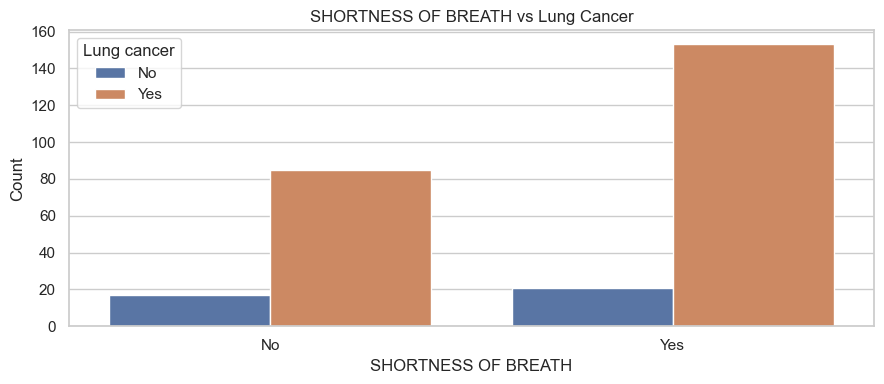

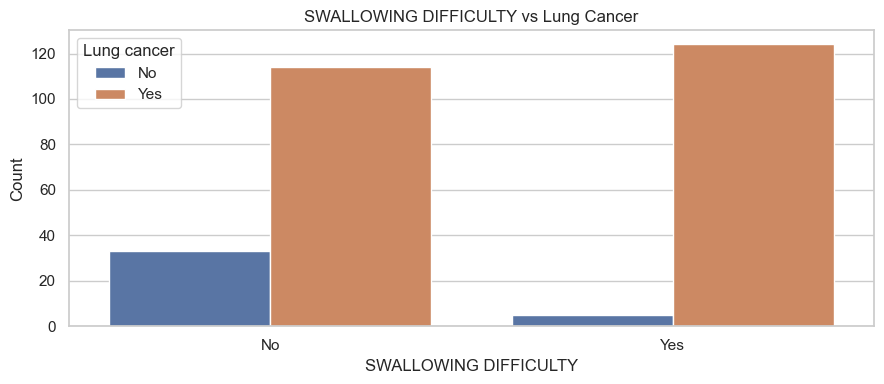

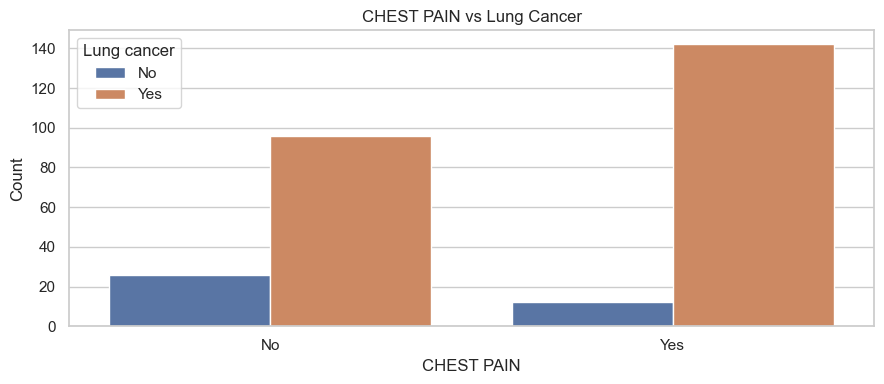

In [17]:
# Quick scan: each binary feature vs lung cancer 
features = [c for c in lungData.columns if c not in ["GENDER","AGE","LUNG CANCER"]]

for c in features:
    plt.figure(figsize=(9,4))
    sns.countplot(data=lungData, x=c, hue="LUNG CANCER", order=["No","Yes"])
    plt.title(f"{c} vs Lung Cancer")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.legend(title="Lung cancer")
    plt.tight_layout()
    plt.show()


## 4- Discussion
### <span style="color:#808080">Let's discuss and break down our findings from each graph. I will discuss why I made each visualization, what I learned and analyzed from each. </span>

After thoroughly examining the dataset on lung cancer statistics, we now delve into interpretation and analysis. In this phase, I will unpack the findings from the data exploration, searching for patterns, correlations, and implications.

In Section 3.1, I created a bar graph illustrating the correlation between alcohol consumption and lung cancer. From this, I observed that the majority of people who consume alcohol are diagnosed with lung cancer. Similarly, in Section 3.2, individuals who smoke are more likely to develop lung cancer than non-smokers, although the numbers are fairly close. In Section 3.3, I combined the data for smokers and drinkers to assess the collective impact. We can infer that both a: non-smokers who drink and b: smokers who drink are likely to develop lung cancer.

Moving to Section 3.4, we observe that the peak of the plot is around 60, indicating that most people receive a diagnosis around the age of 60 and above. This suggests that individuals should exercise extra caution regarding their health starting from the age of 50, as their risk of lung cancer increases rapidly with progressing years.

Lung cancer is evenly distributed among males and females. While males are more likely to develop lung cancer, women are not far behind. Attentiveness is crucial for everyone.

Section 3.6 provides a visual representation of all the symptoms of lung cancer in the dataset. Recognizing the value of knowing the statistics on each experienced symptom, I created a graph for each column in the dataset, including age, gender, alcohol, and smoking, covered in Sections 3.1-3.5. This detailed approach is beneficial for visual learners to comprehend various implementations of the graphs. Hence, I present a more detailed graph for age. The interpretation from the graphs indicates that most people with lung cancer commonly experience symptoms such as yellow fingers, anxiety, other chronic diseases, fatigue, coughing, difficulty breathing, and chest pain. Some common symptoms experienced by both cancer and non-cancer patients include anxiety, chronic diseases, swallowing difficulty, allergies, wheezing, and yellow fingers. These symptoms are also associated with regular flu and seasonal allergies, making them less alarming and often dismissed by the public. 

I propose that spreading awareness of cancer symptoms from early adulthood is crucial, as most diagnoses occur at 60 and above. This way, young adults can build a healthy lifestyle, avoid smoking and drinking, and remain attentive for any early signs to prevent the spread of cancer.

This concludes my Data Analysis Report. Thank you!

## 5- References
### <span style="color:#808080">Here, I am citing all the resouces I have used in this report! Thank you to my references. </span>

1. Source data - https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data
2. Pandas for data manipulation
3. Seaborn for data visualization
4. Matplotlib for data visualization
5. Chat GPT for text prompts in Introduction